In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation
from matplotlib.animation import FuncAnimation, PillowWriter
import os
from IPython.display import Image


from kalman_utils import *

from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from scipy.linalg import block_diag
from filterpy.stats import plot_covariance_ellipse
from filterpy.common import Saver

const_acceleration_x = 2
const_acceleration_y = 1
dt=0.001
t= np.arange(0, 1.01, dt)
N = len(t)
traj = (2*(t**5)- 1.5*(t**4) + 0.05*(t**3) - 3*(t**2)+3*t)

t= (t)*100
traj= (traj)*100

### Utils Function

In [2]:
#const_acceleration_x = 2
#const_acceleration_y = 1
dt=0.001
t= np.arange(0, 1.01, dt)
N = len(t)
traj = (2*(t**5)- 1.5*(t**4) + 0.05*(t**3) - 3*(t**2)+3*t)

t= (t)*100
traj= (traj)*100

init_global(const_acc_x=2, const_acc_y=1, dt_=dt, t_=t , N_= N, traj_=traj)

In [3]:
x_vel, y_vel = get_x_y_velocities()

measurements = pd.DataFrame()
measurements['x_pos']= t
measurements['y_pos']= traj
measurements['x_vel']= x_vel
measurements['y_vel']= y_vel
measurements.head(1000)

,x_pos,y_pos,x_vel,y_vel
0,0.0,0.000000,0.000000,0.000000
1,0.1,0.299700,0.191308,0.391009
2,0.2,0.598800,0.510755,0.709856
3,0.3,0.897300,-0.235835,-0.037334
4,0.4,1.195200,-0.136474,0.061427
...,...,...,...,...
995,99.5,54.445200,-0.088390,-0.082227
996,99.6,54.552950,0.447734,0.455485
997,99.7,54.662297,0.168266,0.177613
998,99.8,54.773249,0.339224,0.350176


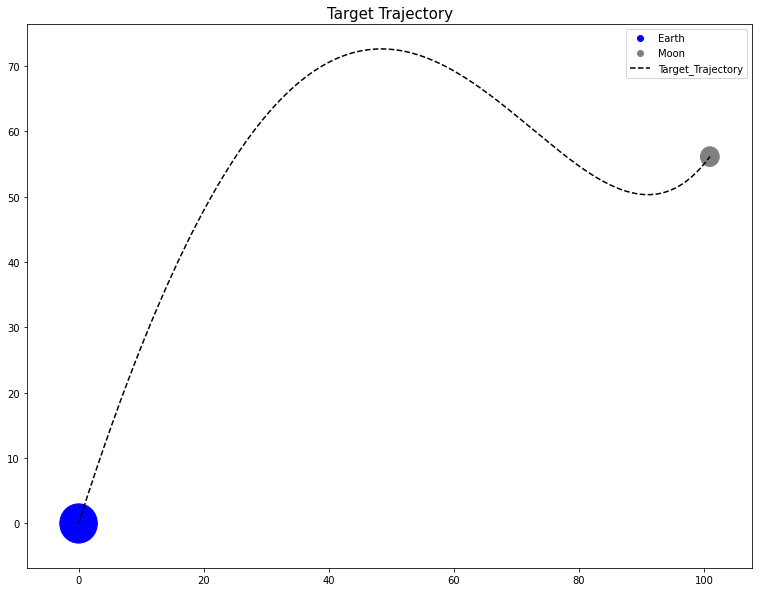

<Figure size 936x720 with 0 Axes>

In [4]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(1,1,1)
plot_measurements(measurements,ax)

## Adding noise to the Position

Text(0.5, 1.0, 'Noisy Trajectory')

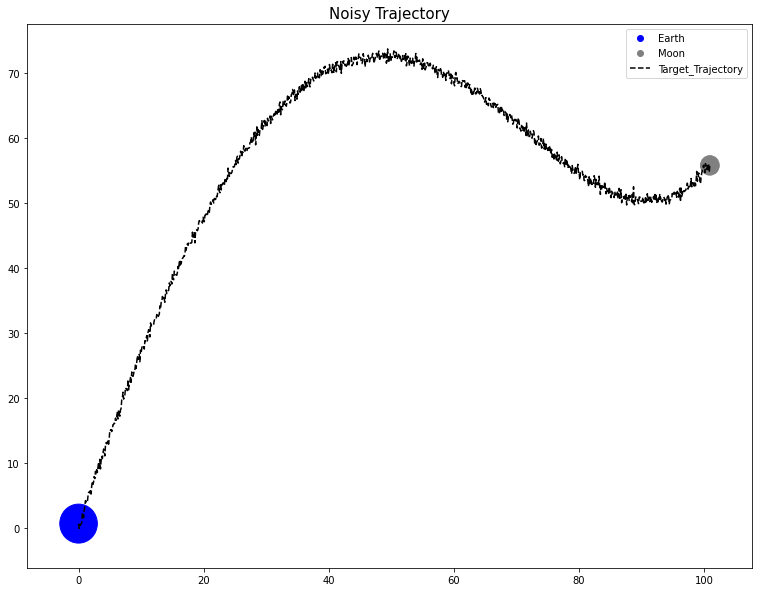

<Figure size 936x720 with 0 Axes>

In [5]:
sigma_pos = 0.5
mu_pos = 0

np.random.seed(24)

noise_t = np.random.normal(loc = mu_pos, scale = sigma_pos, size=N)
traj_noisy = traj+noise_t

measurements["y_pos"] = traj_noisy


fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(1,1,1)
plot_measurements(measurements,ax)

ax.set_title("Noisy Trajectory", fontsize=15)

## Kalman Filtering

In [6]:
tracker = Ship_tracker(measurements)
zs = measurements[["x_pos","y_pos"]].to_numpy()

preds, cov = run(tracker, zs)

pd.DataFrame(preds, columns=["x_pos_pred", "y_pos_pred", "x_vel_pred", "y_vel_pred", "x_acc_pred", "y_acc_pred" ]).head(20).style.set_caption("Preditions")

,x_pos_pred,y_pos_pred,x_vel_pred,y_vel_pred,x_acc_pred,y_acc_pred
0,0.000000,0.664606,0.000000,0.000000,0.000000,0.000000
1,0.059999,0.212863,20.000522,-149.090644,0.030001,-0.223635
2,0.150000,0.284638,50.000408,-55.570191,0.100000,-0.005344
3,0.257144,0.328326,71.428917,-18.785124,0.178570,0.129502
4,0.366668,0.497672,83.333684,39.300663,0.249995,0.477060
5,0.474361,0.653251,89.744094,69.498579,0.314093,0.776837
6,0.580006,1.329123,93.334104,204.366482,0.373304,2.972276
7,0.684098,1.821658,95.455421,260.195925,0.429486,4.420952
8,0.787100,1.886760,96.775072,226.805771,0.483801,3.086173
9,0.889356,2.349826,97.634706,262.964836,0.536862,5.236412


Text(0.5, 1.0, 'Noisy Trajectory vs Kalman Predition')

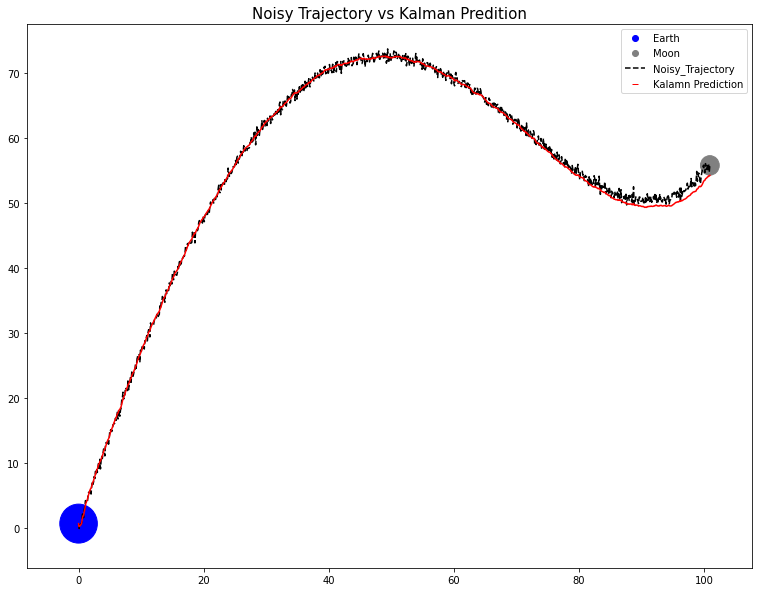

<Figure size 936x720 with 0 Axes>

In [7]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(1,1,1)

plot_prediction(preds,measurements,ax)

ax.set_title("Noisy Trajectory vs Kalman Predition", fontsize=15)

space_anim = SpaceAnimation(preds,measurements)

folder_path = "./Animations/spaceship_pred_animation_all_data.gif"

space_anim.save_and_visualize_animation("./prove.gif")

In [8]:
plt.figure(figsize=(13,10))
#plot_comparison_ellipse_covariance(preds,cov)

<Figure size 936x720 with 0 Axes>

<Figure size 936x720 with 0 Axes>

space_anim = SpaceAnimation(preds,measurements, cov)

folder_path_cov = "./Animations/spaceship_covariance_Ellipsoide.gif"

space_anim.save_anim_cov(folder_path_cov)

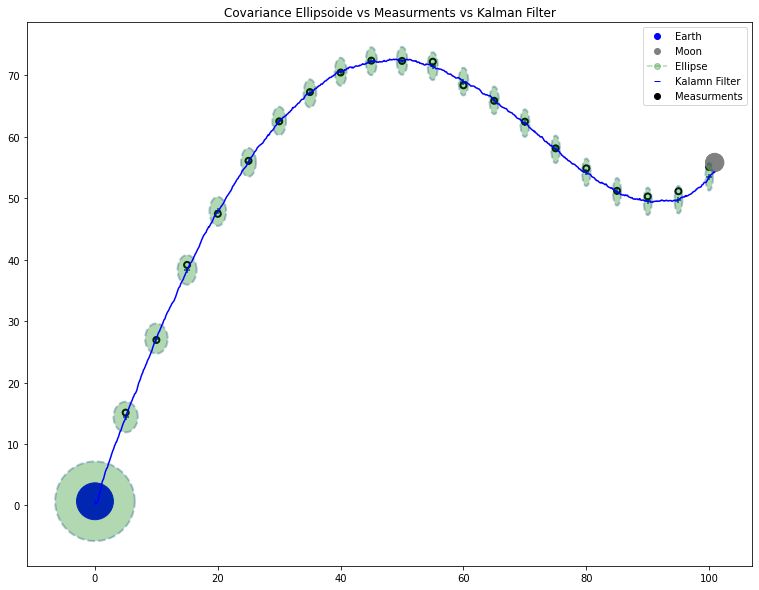

In [9]:
plot_comparison_ellipse_covariance(measurements, preds, cov )